Diz Osteoraiti(kireçlenmesi)Tespiti

Problem Nedir? Problemin Tanımı / Projenin Amacı

Diz osteoartriti (KOA), eklem kıkırdağının aşınması ve yıpranması sonucu eklemde ağrı, sertlik ve hareket kısıtlılığına yol açan bir hastalıktır. Yaşla birlikte daha yaygın hale gelir ve dünya genelinde milyonlarca insanı etkiler. Röntgen görüntüleri, KOA'nın teşhisi ve evreleme sürecinde önemli bir rol oynar. Geleneksel yöntemlerde doktorlar röntgenleri manuel olarak inceleyerek osteoartrit derecelendirmesi yapar, bu da zaman alıcı ve subjektif olabilir. Yapay zeka (YZ) destekli çözümler, bu süreci otomatik hale getirerek daha hızlı ve daha doğru sonuçlar elde edilmesini sağlayabilir.

Bu proje ile yapay zeka ve görüntü işleme teknikleri kullanarak diz eklemindeki osteoartrit semptomlarını otomatik olarak tespit edebilir ve hastalığın ilerleme seviyesini sınıflandırabiliriz. Diz röntgenleri üzerinden yapılan bu analiz, doktorların hastalığın teşhis ve tedavi planlamasında daha hızlı ve etkili kararlar vermesine yardımcı olabilir.

Problemin Görseli

https://imgur.com/a/S07IAYg


Veri Seti

Toplam eğitim örneği: 40

Toplam test örneği: 22

toplam Etiket Sayısı : 62


In [37]:
import logging
import os
import sys
import tempfile
from glob import glob
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


import monai
from monai.transforms import Compose, LoadImage, ScaleIntensity, RandSpatialCrop, RandRotate90, Activations, AsDiscrete
from monai.data import ArrayDataset, create_test_image_2d, decollate_batch, DataLoader
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.transforms import (
    Activations,
    AsDiscrete,
    Compose,
    LoadImage,
    RandRotate90,
    RandSpatialCrop,
    ScaleIntensity)
from monai.visualize import plot_2d_or_3d_image
import matplotlib.pyplot as plt

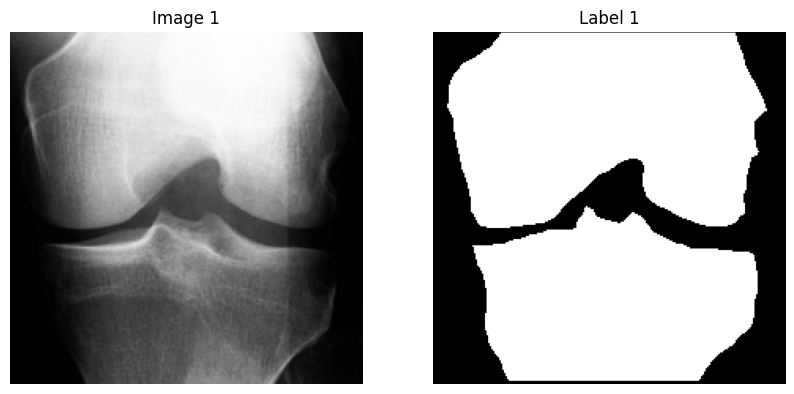

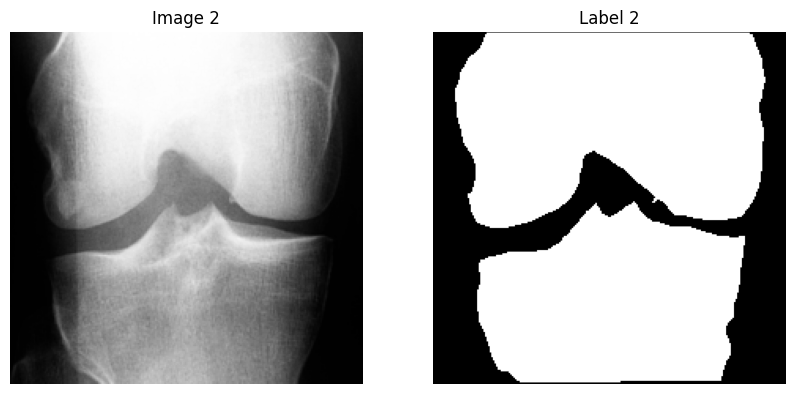

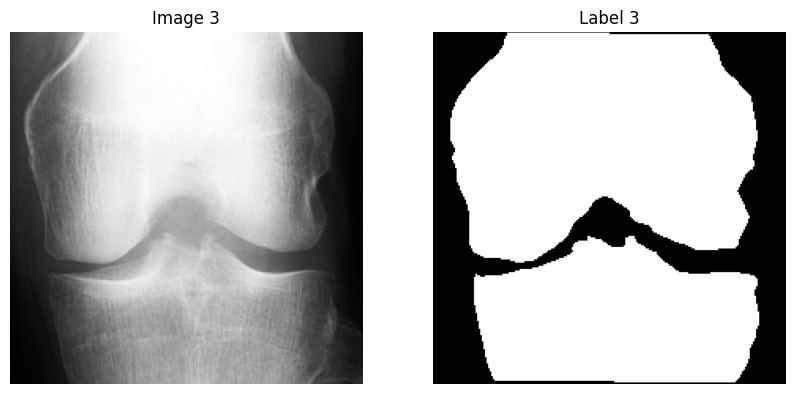

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

# İlk 3 görsel ve etiket dosyalarının yolları
image_paths = [
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png",
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(5).png",
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(12).png"
]

label_paths = [
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\labels\label(4).png",
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\labels\label(5).png",
    r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\labels\label(12).png"

]

# İlk 3 görsel ve etiket maskesini döngü ile aç ve görüntüle
for i in range(3):
    # Görselleri aç
    image = Image.open(image_paths[i])
    label = Image.open(label_paths[i])
    
    # Görseli görüntüle
    plt.figure(figsize=(10, 5))
    
    # Görsel
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')
    
    # Etiket
    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap='gray')
    plt.title(f"Label {i + 1}")
    plt.axis('off')
    
    plt.show()


In [39]:
import os
import glob

# Masaüstü yolunuzu açıkça tanımlayın
desktop_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim"

# images klasörünün tam yolunu oluşturun
images_folder = os.path.join(desktop_path, "images")

# .png uzantılı dosyaları bulmak için glob kullanın
images = sorted(glob.glob(os.path.join(images_folder, "*.png")))

# Dosya listesini yazdır (kontrol için)
print(images)


['C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(1).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(10).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(11).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(12).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(13).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(14).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(15).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(16).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(17).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(18).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(19).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\image(2).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\images\\ima

In [40]:
import os
import glob

# Kullanıcının masaüstü yolunu tanımlayın
desktop_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim"

# labels klasörünün tam yolunu oluşturun
label_folder = os.path.join(desktop_path, "labels")

# .png uzantılı dosyaları bulmak için glob kullanın
labels = sorted(glob.glob(os.path.join(label_folder, "*.png")))

# Dosya listesini yazdır (kontrol için)
print(labels)

['C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(1).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(10).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(11).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(12).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(13).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(14).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(15).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(16).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(17).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(18).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(19).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\label(2).png', 'C:\\Users\\omery\\Desktop\\biyomedikalyenidenegitim\\labels\\lab

In [41]:
# Eğitim görüntü dönüşümleri
train_imtrans = Compose(
    [
        LoadImage(image_only=True, ensure_channel_first=True),
        ScaleIntensity(),

        RandRotate90(prob=0.5, spatial_axes=(0, 1)),
    ]
)

# Eğitim etiket dönüşümleri
train_labeltrans = Compose(
    [
        LoadImage(image_only=True, ensure_channel_first=True),
        ScaleIntensity(),

        RandRotate90(prob=0.5, spatial_axes=(0, 1)),
    ]
)

# Test görüntü dönüşümleri
test_imtrans = Compose([LoadImage(image_only=True, ensure_channel_first=True), ScaleIntensity()])
test_labeltrans = Compose([LoadImage(image_only=True, ensure_channel_first=True), ScaleIntensity()])

# Post-processing dönüşümleri
post_trans = Compose([Activations(sigmoid=True), AsDiscrete(threshold=0.6)])


In [42]:
# Eğitim verisi için veri kümesi oluşturma
train_ds = ArrayDataset(images[:40], train_imtrans, labels[:40], train_labeltrans)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=8, pin_memory=torch.cuda.is_available())

# Test verisi için veri kümesi oluşturma
test_ds = ArrayDataset(images[40:], test_imtrans, labels[40:], test_labeltrans)
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=4, pin_memory=torch.cuda.is_available())

In [43]:
# Eğitim ve test veri kümesinde kullanılan görüntülerin sayısını yazdırma
train_image_count = len(images[:40])
test_image_count = len(images[40:])

print(f"Eğitim verisinde kullanılan görüntü sayısı: {train_image_count}")
print(f"Test verisinde kullanılan görüntü sayısı: {test_image_count}")


Eğitim verisinde kullanılan görüntü sayısı: 40
Test verisinde kullanılan görüntü sayısı: 22


In [44]:
dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = monai.networks.nets.UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)
loss_function = monai.losses.DiceLoss(sigmoid=True)
#optimizer = torch.optim.Adam(model.parameters(), 1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [46]:
epoch_len = len(train_loader)  # Batch sayısını doğrudan train_loader'dan al

In [47]:
pip install --upgrade torch torchvision


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
for epoch in range(20):  # 20 epoch eğitimi
    print("-" * 20)
    print(f"Epoch {epoch + 1}/20")
    model.train()
    epoch_loss = 0
    step = 0

    for i, batch_data in enumerate(train_loader):
        try:
            step += 1
            inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
            
            # Eğer labels çok kanallı ise tek kanala dönüştür
            labels = labels[:, 0:1, :, :]  # (B, 1, H, W) formatına indirgeme
            
            # Modelin tahmini
            outputs = model(inputs)
            
            # Eğer model çıkışı tek kanallı, ama label çok kanallı ise:
            # outputs = outputs.repeat(1, 3, 1, 1)  # Genişletme (Opsiyonel)

            # Loss hesaplama
            outputs = torch.sigmoid(outputs)  # Eğer DiceLoss kullanıyorsanız
            loss = loss_function(outputs, labels)
            
            # Backpropagation ve optimizasyon
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss birikimi
            epoch_loss += loss.item()
        except Exception as e:
            print(f"Hata Epoch: {epoch + 1}, Batch: {i}")
            print(f"Detaylı Hata: {e}")
            continue  # Hatalı batch'i atla

    # Epoch başına loss
    epoch_loss /= step
    print(f"Epoch {epoch + 1} Ortalama Kayıp: {epoch_loss:.4f}")


--------------------
Epoch 1/20
Epoch 1 Ortalama Kayıp: 0.2668
--------------------
Epoch 2/20
Epoch 2 Ortalama Kayıp: 0.2625
--------------------
Epoch 3/20
Epoch 3 Ortalama Kayıp: 0.2589
--------------------
Epoch 4/20
Epoch 4 Ortalama Kayıp: 0.2563
--------------------
Epoch 5/20
Epoch 5 Ortalama Kayıp: 0.2544
--------------------
Epoch 6/20
Epoch 6 Ortalama Kayıp: 0.2522
--------------------
Epoch 7/20
Epoch 7 Ortalama Kayıp: 0.2505
--------------------
Epoch 8/20
Epoch 8 Ortalama Kayıp: 0.2498
--------------------
Epoch 9/20
Epoch 9 Ortalama Kayıp: 0.2488
--------------------
Epoch 10/20
Epoch 10 Ortalama Kayıp: 0.2480
--------------------
Epoch 11/20
Epoch 11 Ortalama Kayıp: 0.2473
--------------------
Epoch 12/20
Epoch 12 Ortalama Kayıp: 0.2468
--------------------
Epoch 13/20
Epoch 13 Ortalama Kayıp: 0.2461
--------------------
Epoch 14/20
Epoch 14 Ortalama Kayıp: 0.2459
--------------------
Epoch 15/20
Epoch 15 Ortalama Kayıp: 0.2458
--------------------
Epoch 16/20
Epoch 16 O

In [50]:

# Görselleri göstermek için goster fonksiyonunu tanımlayın
def goster(images):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Görsel 1: Test görüntüsü
    ax[0].imshow(images[0], cmap='gray')
    ax[0].set_title("Test Image")
    ax[0].axis('off')  # Eksenleri gizle

    # Görsel 2: Etiketler
    ax[1].imshow(images[1], cmap='gray')
    ax[1].set_title("Label")
    ax[1].axis('off')  # Eksenleri gizle

    # Görsel 3: Model çıktısı
    ax[2].imshow(images[2], cmap='gray')
    ax[2].set_title("Model Output")
    ax[2].axis('off')  # Eksenleri gizle

    plt.show()



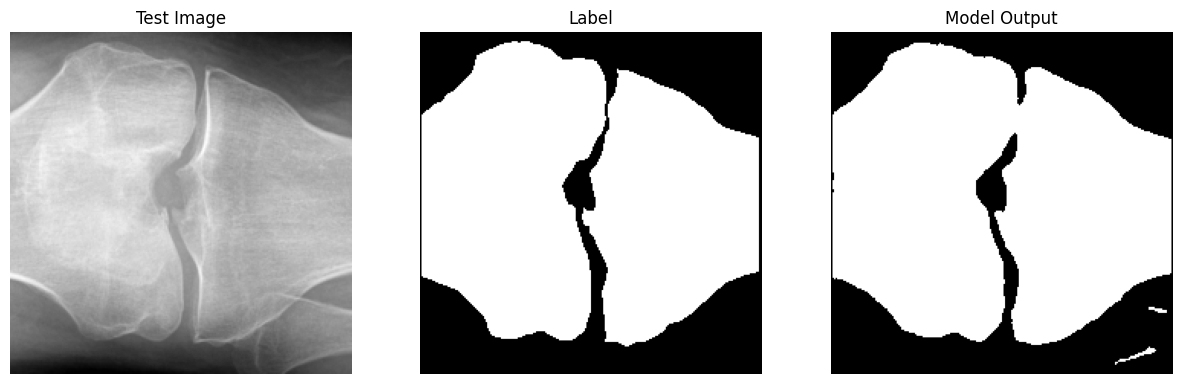

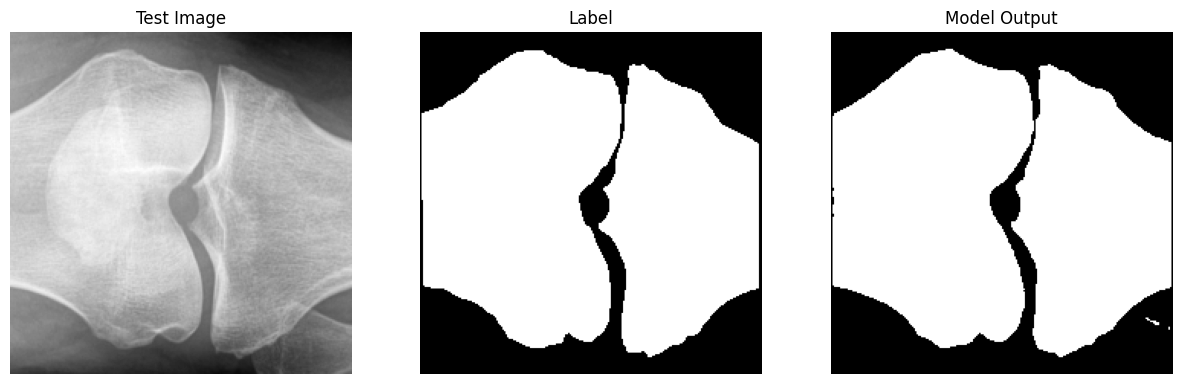

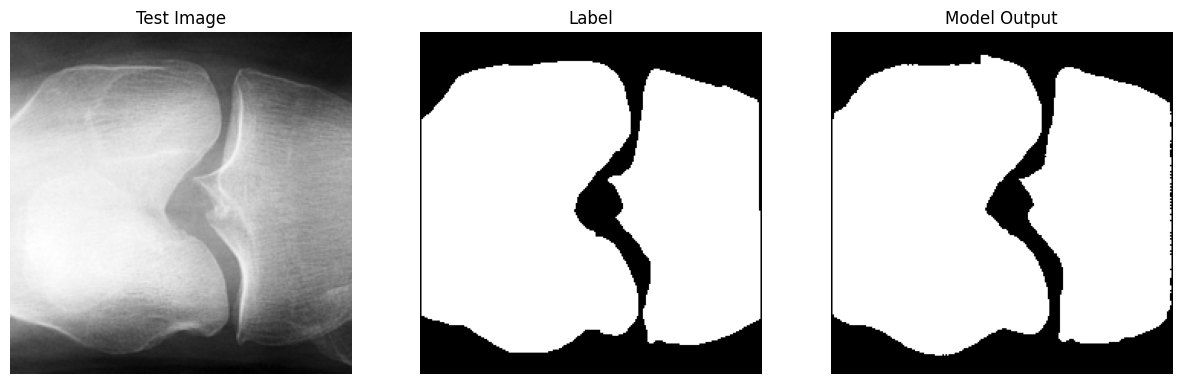

In [51]:
import random

# Test veri setinde rastgele 3 örnek seçmek için
img = 0
num_random_samples = 3

# Test setindeki örnekleri karıştır
random_indices = random.sample(range(len(test_loader.dataset)), num_random_samples)

for idx in random_indices:
    # İlgili veriyi almak için DataLoader'dan direkt indeksleme
    test_data = test_loader.dataset[idx]
    test_images, test_labels = test_data[0].unsqueeze(0).to(device), test_data[1].unsqueeze(0).to(device)

    # Doğrudan tahmin yap (sliding window kaldırıldı)
    test_outputs = model(test_images)  
    test_outputs = [post_trans(i) for i in decollate_batch(test_outputs)]  # Son işlem

    # Görselleştirme
    goster([test_images[0][0].cpu().detach().numpy(),
            test_labels[0][0].cpu().detach().numpy(),
            test_outputs[0][0].cpu().detach().numpy()])

    img += 1
    if img == num_random_samples:
        break


In [52]:
import numpy as np

def dice_score(pred, target):
    """Dice Score hesaplama fonksiyonu."""
    pred = pred > 0.5  # Çıktıları ikili hale getir (threshold: 0.5)
    target = target > 0.5  # Etiketleri ikili hale getir

    intersection = np.logical_and(pred, target).sum()
    union = pred.sum() + target.sum()

    if union == 0:
        return 1.0  # Hem tahmin hem de hedef tamamen sıfırsa Dice Score 1 kabul edilir.

    return 2.0 * intersection / union

def iou_score(pred, target):
    """IoU (Intersection over Union) hesaplama fonksiyonu."""
    pred = pred > 0.5  # Çıktıları ikili hale getir (threshold: 0.5)
    target = target > 0.5  # Etiketleri ikili hale getir

    intersection = np.logical_and(pred, target).sum()
    union = np.logical_or(pred, target).sum()

    if union == 0:
        return 1.0  # Hem tahmin hem de hedef tamamen sıfırsa IoU 1 kabul edilir.

    return intersection / union

# Test veri setinde Dice Score ve IoU hesaplama
num_samples = len(test_loader.dataset)
total_dice_score = 0
total_iou_score = 0

for idx in range(num_samples):
    # Test veri setindeki görüntü ve etiketleri al
    test_data = test_loader.dataset[idx]
    test_images, test_labels = test_data[0].unsqueeze(0).to(device), test_data[1].unsqueeze(0).to(device)

    # Model çıktısını hesapla
    test_outputs = model(test_images)
    test_outputs = [post_trans(i) for i in decollate_batch(test_outputs)]  # Son işlem

    # Dice Score ve IoU hesapla
    pred = test_outputs[0][0].cpu().detach().numpy()
    label = test_labels[0][0].cpu().detach().numpy()
    dice = dice_score(pred, label)
    iou = iou_score(pred, label)
    total_dice_score += dice
    total_iou_score += iou

    print(f"Sample {idx + 1}: Dice Score = {dice:.4f}, IoU = {iou:.4f}")

# Ortalama Dice Score ve IoU
average_dice_score = total_dice_score / num_samples
average_iou_score = total_iou_score / num_samples
print(f"\nAverage Dice Score: {average_dice_score:.4f}")
print(f"Average IoU: {average_iou_score:.4f}")


Sample 1: Dice Score = 0.9895, IoU = 0.9792
Sample 2: Dice Score = 0.9850, IoU = 0.9704
Sample 3: Dice Score = 0.9824, IoU = 0.9654
Sample 4: Dice Score = 0.9862, IoU = 0.9728
Sample 5: Dice Score = 0.9829, IoU = 0.9665
Sample 6: Dice Score = 0.9864, IoU = 0.9731
Sample 7: Dice Score = 0.9855, IoU = 0.9715
Sample 8: Dice Score = 0.9848, IoU = 0.9700
Sample 9: Dice Score = 0.9814, IoU = 0.9636
Sample 10: Dice Score = 0.9748, IoU = 0.9508
Sample 11: Dice Score = 0.9878, IoU = 0.9760
Sample 12: Dice Score = 0.9860, IoU = 0.9724
Sample 13: Dice Score = 0.9797, IoU = 0.9601
Sample 14: Dice Score = 0.9773, IoU = 0.9556
Sample 15: Dice Score = 0.9765, IoU = 0.9540
Sample 16: Dice Score = 0.9827, IoU = 0.9659
Sample 17: Dice Score = 0.9817, IoU = 0.9641
Sample 18: Dice Score = 0.9789, IoU = 0.9587
Sample 19: Dice Score = 0.9864, IoU = 0.9732
Sample 20: Dice Score = 0.9850, IoU = 0.9703
Sample 21: Dice Score = 0.9891, IoU = 0.9784
Sample 22: Dice Score = 0.9869, IoU = 0.9742

Average Dice Score

En İyi Örnek IoU Skoru: 0.9742


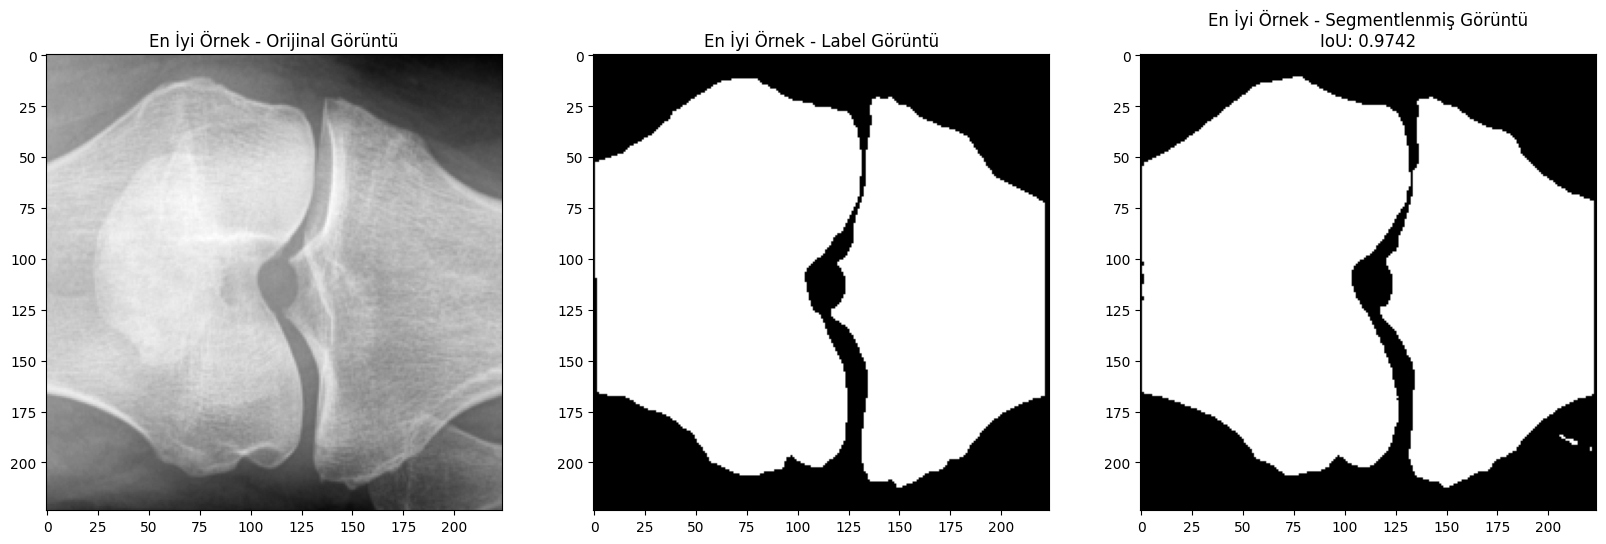

En Kötü Örnek IoU Skoru: 0.9347


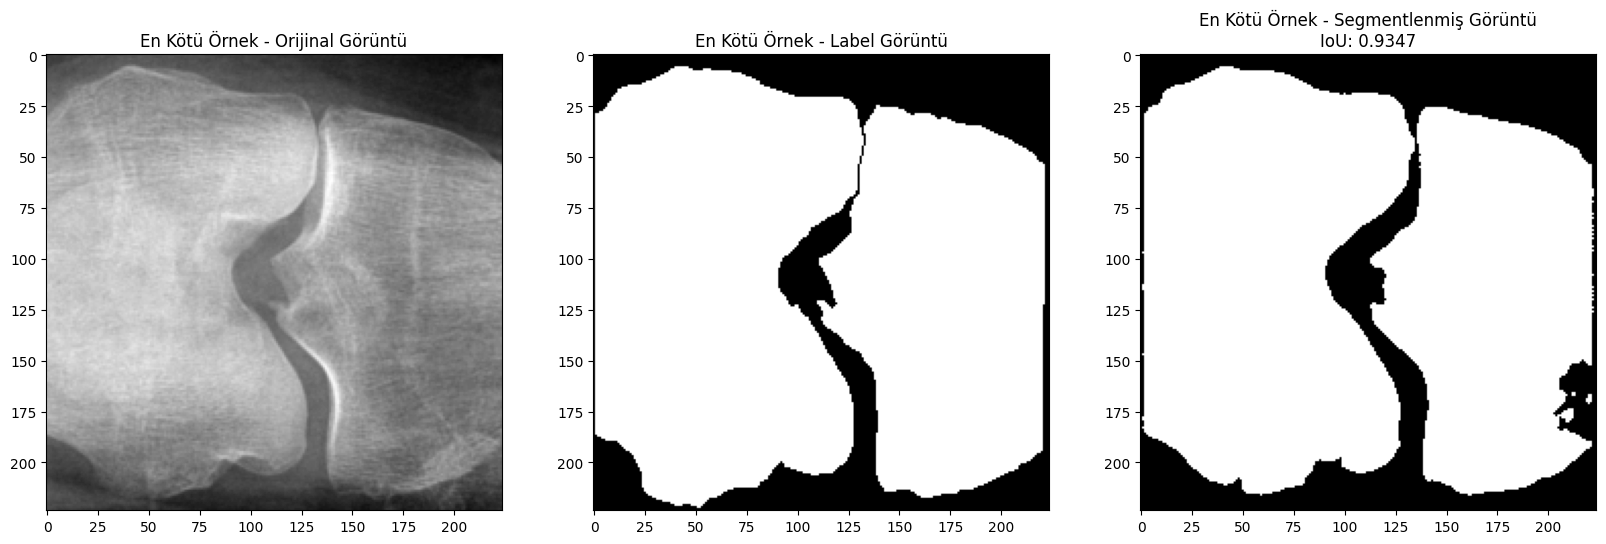

In [53]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# IoU Hesaplama Fonksiyonu
def calculate_iou(output, target):
    smooth = 1e-6
    intersection = torch.logical_and(output, target).sum().item()
    union = torch.logical_or(output, target).sum().item()
    iou = (intersection + smooth) / (union + smooth)
    return iou

# Görselleri Görselleştirme Fonksiyonu
def display_images(original, label_image, segment_image, image_name, iou):
    plt.figure(figsize=(20, 8))
    
    # Orijinal görüntü
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title(f"{image_name} - Orijinal Görüntü")
    
    # Label (Gerçek Etiket)
    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='gray')
    plt.title(f"{image_name} - Label Görüntü")
    
    # Segmentlenmiş Görüntü ve IoU Skoru
    plt.subplot(1, 3, 3)
    plt.imshow(segment_image, cmap='gray')
    plt.title(f"{image_name} - Segmentlenmiş Görüntü\nIoU: {iou:.4f}")
    
    plt.show()

# Performans Skorlarını Değerlendir ve Görselleştir
performance_scores = []

# Test setindeki tüm verileri değerlendir
for idx in range(len(test_loader.dataset)):
    test_data = test_loader.dataset[idx]
    test_images, test_labels = test_data[0].unsqueeze(0).to(device), test_data[1].unsqueeze(0).to(device)

    # Model tahmini
    test_outputs = model(test_images)
    test_outputs = [post_trans(i) for i in decollate_batch(test_outputs)][0]  # Post-process
    
    # IoU hesapla
    iou_score = calculate_iou(test_outputs[0].cpu() > 0.5, test_labels[0].cpu())
    performance_scores.append((idx, iou_score))

# Performansa göre sırala
performance_scores = sorted(performance_scores, key=lambda x: x[1], reverse=True)

# En iyi ve en kötü örnekleri seç
best_sample_idx, best_iou = performance_scores[0]
worst_sample_idx, worst_iou = performance_scores[-1]

# En iyi örneği al
best_data = test_loader.dataset[best_sample_idx]
best_images, best_labels = best_data[0].unsqueeze(0).to(device), best_data[1].unsqueeze(0).to(device)
best_outputs = model(best_images)
best_outputs = [post_trans(i) for i in decollate_batch(best_outputs)][0]

# En kötü örneği al
worst_data = test_loader.dataset[worst_sample_idx]
worst_images, worst_labels = worst_data[0].unsqueeze(0).to(device), worst_data[1].unsqueeze(0).to(device)
worst_outputs = model(worst_images)
worst_outputs = [post_trans(i) for i in decollate_batch(worst_outputs)][0]

# Görselleştirme: En İyi Örnek
print(f"En İyi Örnek IoU Skoru: {best_iou:.4f}")
display_images(
    original=best_images[0][0].cpu().numpy(),
    label_image=best_labels[0][0].cpu().numpy(),
    segment_image=best_outputs[0].cpu().numpy(),
    image_name="En İyi Örnek",
    iou=best_iou
)

# Görselleştirme: En Kötü Örnek
print(f"En Kötü Örnek IoU Skoru: {worst_iou:.4f}")
display_images(
    original=worst_images[0][0].cpu().numpy(),
    label_image=worst_labels[0][0].cpu().numpy(),
    segment_image=worst_outputs[0].cpu().numpy(),
    image_name="En Kötü Örnek",
    iou=worst_iou
)


In [54]:
import torch.nn as nn

# Basit bir örnek model tanımı
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# Modeli oluştur
model = MyModel()


In [55]:
# Örnek bir model: ResNet, UNet veya diğer PyTorch modelleri
from torchvision.models import resnet18

model = resnet18(pretrained=False)  # Modeli tanımlayın


In [56]:
import os
import torch

# Dosya yolunun doğru olduğundan emin olun ve dizin mevcutsa oluşturun
model_dir = "Python"  # Dizin adı
if not os.path.exists(model_dir):  # Eğer dizin yoksa
    os.makedirs(model_dir)  # Dizini oluştur

# Modeli kaydedin
torch.save(model.state_dict(), os.path.join(model_dir, "model.pth"))

In [57]:
torch.save(model.state_dict(), "Python\model.pth")